In [1]:
import pandas as pd
datasets = pd.read_csv("/kaggle/input/abrarvai/Fish.csv")


In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
x = datasets[["Length1","Length2","Length3","Height","Width"]]
y = datasets["Weight"]

In [4]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape,x_test.shape, y_train.shape, y_train.shape)

(127, 5) (32, 5) (127,) (127,)


In [5]:
degree_of_freedom = 2

ridge = make_pipeline(PolynomialFeatures(degree_of_freedom),Ridge(alpha= 1.0))
ridge.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [6]:
prediction_result_ridge = ridge.predict(x_test)
print(prediction_result_ridge)

[ 9.47909562e+01 -7.60183486e-01  2.27496318e+02  2.56202569e+02
  1.05724070e+02  8.23102820e+02  1.86700655e+00  1.70985247e+02
  1.87672298e+02  1.36183326e+03  6.27981763e+02  8.17088537e+02
  5.67946618e+02  1.43367968e+02  6.60959411e+02  8.66744144e+02
  1.13087669e+03  1.87222871e+02  1.84888244e+02  5.72219868e+02
 -3.43996264e+00  5.71772227e+02  4.52871057e+02  4.81391171e+02
  8.65586574e+02  1.01487026e+03  1.49847374e+02  2.55980289e+02
  1.56518157e+01 -3.29926322e+00  4.58982487e+02  6.53528918e+01]


In [7]:
lasso = make_pipeline(PolynomialFeatures(degree_of_freedom),Lasso(alpha = 1.0))
lasso.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso())])

In [8]:
prediction_result_lasso = lasso.predict(x_test)
print(prediction_result_lasso)


[  83.97645283    6.93423807  185.88665907  238.3342485   100.54839708
  891.07434157   13.80349943  177.86976698  183.69841893 1347.10598649
  624.19050147  824.65440192  588.50437337  152.58743935  658.28923942
  875.50189516 1119.47638164  213.98471176  170.99689395  562.68085037
    7.16600467  567.82786304  417.69264815  471.30562811  875.08618488
 1025.28342829  140.17705077  235.12102949   24.38375624    6.07993847
  512.60366066   63.51843364]


In [9]:
ridge_mean_squared_error = mean_squared_error(y_test, prediction_result_ridge,squared = False)
ridge_r2 = r2_score(y_test, prediction_result_ridge)
lasso_mean_squared_error = mean_squared_error(y_test,prediction_result_lasso, squared = False)
lasso_r2 = r2_score(y_test,prediction_result_lasso)

In [10]:
print(ridge_mean_squared_error)
print(lasso_mean_squared_error)


67.4570984574017
61.303126790443564


In [11]:
print(ridge_r2)
print(lasso_r2)


0.9680084157231454
0.9735792168402823


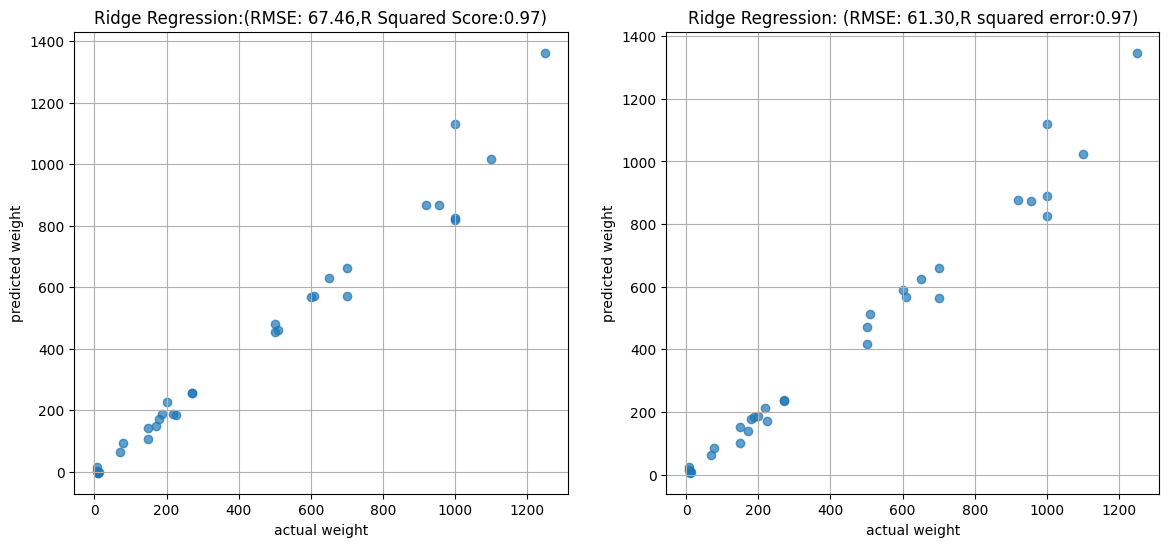

In [12]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, prediction_result_ridge,alpha =0.7)
plt.xlabel('actual weight')
plt.ylabel('predicted weight')
plt.title(f"Ridge Regression:(RMSE: {ridge_mean_squared_error:.2f},R Squared Score:{ridge_r2:.2f})")
plt.grid(True)


plt.subplot(1,2,2)
plt.scatter(y_test, prediction_result_lasso,alpha = 0.7)
plt.xlabel("actual weight")
plt.ylabel("predicted weight")
plt.title(f"Ridge Regression: (RMSE: {lasso_mean_squared_error:.2f},R squared error:{lasso_r2:.2f})")
plt.grid(True)

plt.show()